In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1. Using sklearn.datasets.load_diabetes apply Variance method for removing the constant column also after applying the Variance method apply multi linear regression on that data 


In [2]:
# Loading diabetes data from sklearn
from sklearn import datasets
data = datasets.load_diabetes()

In [3]:
# Converting loaded data into datframe using pandas
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [4]:
# Quick look
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
# Getting all independent features into a variable
X = df.drop("target", axis=1)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
# Applying varianceThreshold to get constant columns
from sklearn.feature_selection import VarianceThreshold
var= VarianceThreshold()
op = var.fit(X)

In [9]:
op.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [10]:
X.columns[op.get_support() == False]

Index([], dtype='object')

In [11]:
# Checking actual variance of independent variable
X.var()

age    0.002268
sex    0.002268
bmi    0.002268
bp     0.002268
s1     0.002268
s2     0.002268
s3     0.002268
s4     0.002268
s5     0.002268
s6     0.002268
dtype: float64

## As the variance of each independent feature is same . we can not remove any feature by using variance threshold.

## Applying multilinear regression on the data

In [12]:
# independent and dependent feature
iv = X.values
dv = df[['target']].values

In [13]:
# importing train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iv, dv, test_size=0.2, random_state=250)

In [14]:
# Printing Train & Test stats
print(f"Training Stats:=> {X_train.shape} | {y_train.shape}")
print(f"Testing Stats:=> {X_test.shape} | {y_test.shape}")

Training Stats:=> (353, 10) | (353, 1)
Testing Stats:=> (89, 10) | (89, 1)


In [15]:
# Importing linear model from sklearn
from sklearn import linear_model
multi_reg = linear_model.LinearRegression()

In [16]:
# fitting model
multi_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
# Coeficient & intercept
print(f"Coeficient : {multi_reg.coef_[0]} \n")
print(f"Intercept : {multi_reg.intercept_[0]}")

Coeficient : [  -40.62269638  -281.30796903   448.89295696   321.29717853
 -1367.78877933   900.05364803   337.28241153   362.40856783
   913.78606491    25.88823632] 

Intercept : 151.6573667205313


In [18]:
# Prediction
y_hat = multi_reg.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [20]:
# Calculating error and accuracy
print("Mean Absolute Error  :", mean_absolute_error(y_test, y_hat) )
print("Mean squared Error :", mean_squared_error(y_test, y_hat) )
print(f"R2 score : {r2_score(y_test, y_hat)*100:.2f}%")


Mean Absolute Error  : 50.28086556018373
Mean squared Error : 3585.8292772372283
R2 score : 49.26%


# Q2. Using sklearn.datasets.load_wine Apply Correlation and make a heat map using seaborn and remove the highly correlated columns if exist and the apply SVM and get the best accuracy by changing the Hyperparameters 


In [21]:
# Loading wine data from sklearn datasets
from sklearn import datasets
wine = datasets.load_wine()

In [22]:
# Getting column names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [23]:
# target feature
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [24]:
# Making dataframe of wine data using pandas
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['Target']=pd.Series(wine.target)

In [25]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [27]:
# Getting independent and dependent variable
iv = wine_df.drop("Target", axis=1)
dv=wine_df["Target"]

In [28]:
# splitting data into train & test data
X_train, X_test, y_train, y_test = train_test_split(iv, dv, test_size=0.2, random_state=30)

In [29]:
print(f"X_train shape is : {X_train.shape} \n y_tarin shape is: {y_train.shape}")
print(f"X_test shape is : {X_test.shape} \n y_test shape is: {y_test.shape}")

X_train shape is : (142, 13) 
 y_tarin shape is: (142,)
X_test shape is : (36, 13) 
 y_test shape is: (36,)


## Applying Correlation

In [30]:
corr_matrix = X_train.corr()
corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.072565,0.213462,-0.364409,0.213382,0.280129,0.244927,-0.176331,0.109743,0.537837,-0.022042,0.071479,0.633371
malic_acid,0.072565,1.000000,0.117123,0.255905,-0.079058,-0.328901,-0.418298,0.306642,-0.241555,0.213775,-0.582324,-0.361847,-0.223447
ash,0.213462,0.117123,1.000000,0.434363,0.295350,0.142121,0.119412,0.181996,-0.015376,0.265764,-0.054717,-0.029290,0.240084
alcalinity_of_ash,-0.364409,0.255905,0.434363,1.000000,-0.135081,-0.350087,-0.357839,0.379014,-0.234086,-0.008569,-0.296443,-0.294094,-0.473159
magnesium,0.213382,-0.079058,0.295350,-0.135081,1.000000,0.196116,0.183083,-0.266007,0.252692,0.197377,0.068436,0.036441,0.389154
total_phenols,0.280129,-0.328901,0.142121,-0.350087,0.196116,1.000000,0.879233,-0.419841,0.641260,-0.050988,0.442155,0.707545,0.503703
flavanoids,0.244927,-0.418298,0.119412,-0.357839,0.183083,0.879233,1.000000,-0.514390,0.661770,-0.136091,0.522711,0.767437,0.488752
nonflavanoid_phenols,-0.176331,0.306642,0.181996,0.379014,-0.266007,-0.419841,-0.514390,1.000000,-0.369744,0.101836,-0.216716,-0.486825,-0.323114
proanthocyanins,0.109743,-0.241555,-0.015376,-0.234086,0.252692,0.641260,0.661770,-0.369744,1.000000,-0.075277,0.325225,0.522956,0.318741
color_intensity,0.537837,0.213775,0.265764,-0.008569,0.197377,-0.050988,-0.136091,0.101836,-0.075277,1.000000,-0.457080,-0.421973,0.336120


<AxesSubplot:>

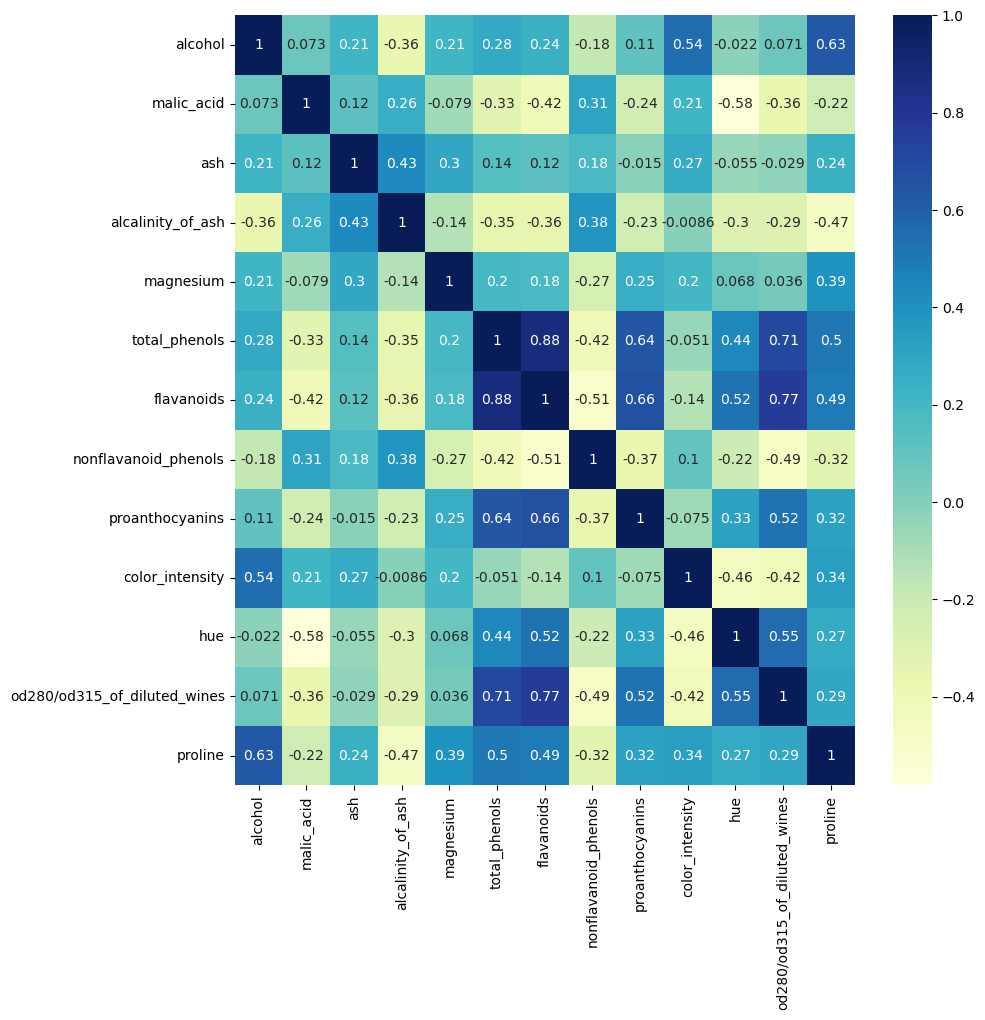

In [31]:
# Plotting Correlation matrix using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix, cmap="YlGnBu", annot=True)

In [32]:
# Getting removable columns which are highly correlated

threshold=0.6
removable_col = set()

for row in range(len(corr_matrix)):
  for col in range(row):
    if abs(corr_matrix.iloc[row][col]) > threshold:
      print(corr_matrix.columns[row] , "==> ", corr_matrix.iloc[row][col])
      removable_col.add(corr_matrix.columns[row])
print()
print(f"The highly correlated columns are:: {removable_col} ")


flavanoids ==>  0.8792329861057864
proanthocyanins ==>  0.6412602178454514
proanthocyanins ==>  0.6617700135657455
od280/od315_of_diluted_wines ==>  0.7075452173835053
od280/od315_of_diluted_wines ==>  0.7674367833200287
proline ==>  0.6333710138427853

The highly correlated columns are:: {'proline', 'flavanoids', 'proanthocyanins', 'od280/od315_of_diluted_wines'} 


In [33]:
# Removing highly correlated data from train & test data
X_train = X_train.drop(removable_col, axis=1)
X_test = X_test.drop(removable_col, axis=1)

In [34]:
# Converting iv and dv in array form

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


In [35]:
# Importing SVC from SVM
from sklearn.svm import SVC

## Training svm using kernal as polynomial

In [36]:
#Train model with SVM using polynomial kernel
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [37]:
# predict data
y_hat = clf.predict(X_test)

In [38]:
# importing performance metrics which are appropriate for classification
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [39]:
print(f"accuracy_score = {accuracy_score(y_test, y_hat)*100:.2f}%")
print(f"f1_score = {f1_score(y_test, y_hat, average = 'weighted')*100:.2f}")

accuracy_score = 58.33%
f1_score = 52.78


## Training svm using kernel as rbf

In [40]:
clf1 = SVC(kernel='rbf')
clf1.fit(X_train, y_train)

SVC()

In [41]:
# predict data
y_hat1 = clf1.predict(X_test)

In [42]:
print(f"accuracy_score = {accuracy_score(y_test, y_hat1)*100:.2f}%")
print(f"f1_score = {f1_score(y_test, y_hat1, average = 'weighted')*100:.2f}")

accuracy_score = 52.78%
f1_score = 45.28


## Training svm using  kernel as linear

In [43]:
clf2 = SVC(kernel='linear')
clf2.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
# predict data
y_hat2 = clf2.predict(X_test)

In [45]:
print(f"accuracy_score = {accuracy_score(y_test, y_hat2)*100:.2f}%")
print(f"f1_score = {f1_score(y_test, y_hat2, average = 'weighted')*100:.2f}")

accuracy_score = 97.22%
f1_score = 97.24


## Using kernel as linear we got highest accuracy as 97.22%

# Q5. Using sklearn.datasets.load_boston apply Mutual info Regression and check which are the best columns according to the target column. 
 

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Loading boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [48]:
# Preparing boston data into dataframe
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df["Target"] = pd.Series(boston.target)

In [49]:
# having a quick look 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
# info about dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [51]:
# Getting independent variables and dependent variable
X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

In [52]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

# Mutual information regression

In [53]:
# importing mutual_info_regression from sklearn
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(X.values, y.values)

In [54]:
mir

array([0.34631784, 0.19112561, 0.47296137, 0.01833826, 0.45475616,
       0.53032349, 0.31481796, 0.29714812, 0.23085895, 0.36237858,
       0.44378634, 0.17115919, 0.66830403])

In [55]:
# indepent features column names
ivnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [56]:
# Converting mir into mir_series and getting mir_ser with column names in decending order
mir_ser = pd.Series(mir)
mir_ser.index = ivnames
mir_ser.sort_values(ascending=False)

LSTAT      0.668304
RM         0.530323
INDUS      0.472961
NOX        0.454756
PTRATIO    0.443786
TAX        0.362379
CRIM       0.346318
AGE        0.314818
DIS        0.297148
RAD        0.230859
ZN         0.191126
B          0.171159
CHAS       0.018338
dtype: float64

In [57]:
# getting least significant columns in a list
removable_column = []
for col in mir_ser.index:
    if mir_ser[col] < 0.20:
        print(col, mir_ser[col])
        removable_column.append(col)
print()
print(f"All the least significant column list is :: {removable_column} ")

ZN 0.1911256099484031
CHAS 0.018338256614125914
B 0.17115919404474367

All the least significant column list is :: ['ZN', 'CHAS', 'B'] 


In [58]:
# removing least significant columns from the independent dataframe
# The best columns according to the target column
data = boston_df.drop(removable_column, axis=1)
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Target
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [59]:
print(f"Shape of data before removing least significant columns ==> {boston_df.shape}")
print(f"Shape of data after removing least significant columns ==> {data.shape}")

Shape of data before removing least significant columns ==> (506, 14)
Shape of data after removing least significant columns ==> (506, 11)


# Q6. Then Apply MultiLinear Regression on that data and try to get best accuracy by changing the hyperparameters


In [60]:
# independent & dependent variable
iv = data.drop('Target', axis=1).values
dv = data['Target'].values

In [61]:
# Splitting the data into train & test data
X_train, X_test, y_train, y_test = train_test_split(iv, dv, test_size=0.2, random_state=130)

In [62]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression()

In [63]:
# Fitting the model
mr.fit(X_train, y_train)

LinearRegression()

In [64]:
# The parameters/ The cooeficient  i.e. Slope(s) & Intercept
print(f"Coeficient:=> {mr.coef_}")
print(f"Intercept:=> {mr.intercept_}")

Coeficient:=> [-1.24760665e-01 -2.38305865e-02 -2.05481515e+01  3.68553030e+00
 -3.11273756e-03 -1.32045009e+00  3.22008321e-01 -1.13433362e-02
 -1.17372672e+00 -5.39634778e-01]
Intercept:=> 46.91542529591281


In [65]:
# Prediction
pred_y = mr.predict(X_test)

In [66]:
# Calculating error
print("Mean Absolute Error :", mean_absolute_error(y_test, pred_y) )
print("Mean squared Error :", mean_squared_error(y_test, pred_y) )
print(f"R2 score : {r2_score(y_test, pred_y)*100:.2f}%")


Mean Absolute Error : 3.0882688695771447
Mean squared Error : 17.012001852270384
R2 score : 74.18%


# Q3. Using sklearn.datasets.load_diabetes apply Mutual info Classification and check which are the best columns according to the target column. 


In [67]:
# Loading diabetes data from sklearn
dibetes = data = datasets.load_diabetes()

In [68]:
# Converting diabetes data into dataframe
diabtes_df = pd.DataFrame(data=dibetes.data, columns=dibetes.feature_names)
diabtes_df['Target'] = pd.Series(dibetes.target)

In [69]:
diabtes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Applying mutual_info_classification

In [70]:
# Getting all independent features
xx= diabtes_df.drop('Target', axis=1)
yy = diabtes_df[['Target']]

In [71]:
# getting all independent features name
iv_columns = xx.columns
iv_columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [72]:
from sklearn.feature_selection import mutual_info_classif
Mic = mutual_info_classif(xx.values, yy.values)
Mic

array([0.06489581, 0.66659634, 0.15260421, 0.03608563, 0.        ,
       0.        , 0.16614562, 0.1754672 , 0.18821166, 0.        ])

In [73]:
# Convert Mir array form into series form with column names
Mic_ser = pd.Series(Mic)
Mic_ser.index = iv_columns
Mic_ser.sort_values(ascending=False)

sex    0.666596
s5     0.188212
s4     0.175467
s3     0.166146
bmi    0.152604
age    0.064896
bp     0.036086
s1     0.000000
s2     0.000000
s6     0.000000
dtype: float64

In [74]:
# Getting unsignificant columns
remov_columns = []
for col in Mic_ser.index:
    if Mic_ser[col] == 0:
        print(col, Mic_ser[col])
        remov_columns.append(col)
print()
print(f"The unsignificant column list is :: {remov_columns} ")

s1 0.0
s2 0.0
s6 0.0

The unsignificant column list is :: ['s1', 's2', 's6'] 


In [75]:
# Removing unsignificant columns from independent variables
xx.drop(remov_columns, axis=1, inplace=True)
xx.head(3)

,age,sex,bmi,bp,s3,s4,s5
0,0.038076,0.050680,0.061696,0.021872,-0.043401,-0.002592,0.019908
1,-0.001882,-0.044642,-0.051474,-0.026328,0.074412,-0.039493,-0.068330
2,0.085299,0.050680,0.044451,-0.005671,-0.032356,-0.002592,0.002864


In [76]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()
xx = scale.fit_transform(xx)

In [77]:
yy.head() # Dependent feature

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


# Q4. Then Apply decision tree on that data and try to get best accuracy by changing the hyperparameters 


In [78]:
# Lets split the data
xx_train, xx_test, yy_train, yy_test= train_test_split(xx, yy, test_size=0.2, random_state=31)

In [79]:
# Printing Training & Testing Statistics
print(f"Training data shape :: {xx_train.shape} | {yy_train.shape}")
print(f"Testing data shape :: {xx_test.shape} | {yy_test.shape}")

Training data shape :: (353, 7) | (353, 1)
Testing data shape :: (89, 7) | (89, 1)


In [80]:
# Initiate decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [81]:
# Train the model with fit method
tree.fit(xx_train, yy_train)

DecisionTreeRegressor()

In [82]:
# Predict from trained model 
y_Hat = tree.predict(xx_test)

In [83]:
f"{tree.score(xx_train, yy_train)*100:.2f}%" # score on training data. we got 100% accuracy because 
                                             # we train the decision tree throught its depth. 

'100.00%'

In [84]:
f"{tree.score(xx_test, yy_test)*100:.2f}%" # score on testing data

'16.76%'

In [85]:
# Calculate R2 score
from sklearn.metrics import r2_score
print(f"Decision Tree's accuracy performance on dibetes data Before hyper parameter tuning : {r2_score(yy_test, y_Hat)*100:.2f}%" )

Decision Tree's accuracy performance on dibetes data Before hyper parameter tuning : 16.76%


In [86]:
# Hyper parameters range intialization for tuning 

parameters={ "criterion":["squared_error", "absolute_error"],
             "splitter":["best","random"],
             "max_depth" : [1,2,3,4,5,6,7],
             "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
             "max_features":["sqrt"]
              }

In [87]:
from sklearn.model_selection import GridSearchCV


In [88]:
tuning_model = GridSearchCV(tree,param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 5 )
tuning_model.fit(xx_train,yy_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [89]:
print(f"\n Best Hyperparameter for DecisionTreeClassifier model :: {tuning_model.best_params_}\n")


 Best Hyperparameter for DecisionTreeClassifier model :: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'splitter': 'best'}



In [90]:
hyper_tunedtree = DecisionTreeRegressor(criterion='squared_error', splitter= 'best', max_depth=4 , 
                                         max_features= 'sqrt', min_samples_leaf= 8)
hyper_tunedtree.fit(xx_train, yy_train)
tuned_pred = hyper_tunedtree.predict(xx_test)

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
print(f"MAE of tree : {mean_absolute_error(yy_test,tuned_pred)}")
print(f"MSE of tree : {mean_squared_error(yy_test,tuned_pred)}")


MAE of tree : 39.02197648866519
MSE of tree : 2563.5644445421044


In [93]:
# calculate accuracy
print(f"Decision Tree's accuracy performance on dibetes data after hyper parameter tuning: {r2_score(yy_test, tuned_pred)*100:.2f}% ", )

Decision Tree's accuracy performance on dibetes data after hyper parameter tuning: 56.96% 
